In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Using an existent Dataset called '50_Startups.csv' from the system and LR using sklearn

In [115]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

# Avoid dummy variable trap
X = X[:, 1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

C:\Users\jithe\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\jithe\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [116]:
#absolute error
abs(y_pred-y_test)

array([  267.17840204, 11677.12239185, 13674.21154825,  5822.73148742,
       12512.90778944, 11152.93230166, 13377.36790324,  1308.17374687,
        3617.18533013,  1733.12569551])

In [117]:
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50,1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 3]]

# Select a significance level to stay SL = 0.05 endog dependant var, exog indep
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
# X_opt = X[:, [0, 1, 3, 4, 5]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()
# X_opt = X[:, [0, 1, 3, 4]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()
# X_opt = X[:, [0, 3, 5]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()
# X_opt = X[:, [0, 3]]
# regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
# regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 04 Jun 2019   Prob (F-statistic):           3.50e-32
Time:                        11:10:29   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Using a synthetic dataset to do LR, and plot entries of datasets vs. Mean Squared Error

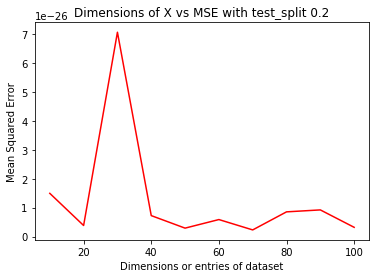

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression 
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

entries = 100
features = 5
X,y = make_regression(n_samples=entries, n_features=features)

X_10 = X[:10, :]
X_20 = X[:20, :]
X_30 = X[:30, :]
X_40 = X[:40, :]
X_50 = X[:50, :]
X_60 = X[:60, :]
X_70 = X[:70, :]
X_80 = X[:80, :]
X_90 = X[:90, :]
X_100 = X[:100, :]

y_10 = y[:10]
y_20 = y[:20]
y_30 = y[:30]
y_40 = y[:40]
y_50 = y[:50]
y_60 = y[:60]
y_70 = y[:70]
y_80 = y[:80]
y_90 = y[:90]
y_100 = y[:100]

# abs_err = abs(y_pred - y_test) 
# sqr_err = (np.array(abs_err) ** 2)
# MSE = sum(sqr_err)/y_test.shape[0]
# print(MSE)
# X[:4, :]

Xs = [X_10, X_20, X_30, X_40, X_50, X_60, X_70, X_80, X_90, X_100]
ys = [y_10, y_20, y_30, y_40, y_50, y_60, y_70, y_80, y_90, y_100]

import array
MSEarray = np.ones((10, 1))

for i in range(10):
    xi = Xs[i]
    yi = ys[i]
    xi_train, xi_test, yi_train, yi_test = train_test_split(xi, yi, test_size = 0.2)
    regress = LinearRegression()
    regress.fit(xi_train, yi_train)
    yi_pred = regress.predict(xi_test)
    abs_err = abs(yi_pred - yi_test)
    sqr_err = (np.array(abs_err) ** 2)
    MSE = sum(sqr_err)/yi_test.shape[0]
    MSEarray[i] = MSE
# plt.scatter(X, y, color="green")
plt.plot([10,20,30,40,50,60,70,80,90,100], MSEarray, color='red')
plt.title('Dimensions of X vs MSE with test_split 0.2')
plt.xlabel('Dimensions or entries of dataset')
plt.ylabel('Mean Squared Error')
plt.show()

# Implementing LR without directly using inbuild functions(single variable)

Standard deviation of X:  43.54780688338116
Standard deviation of y:  82642.8398301562
Correlation coefficient(r):  0.985712071955555
Sy/Sx =  43.56316970433213
Slope of our line:  42.94074227020869
Intercept:  2.748530868551005


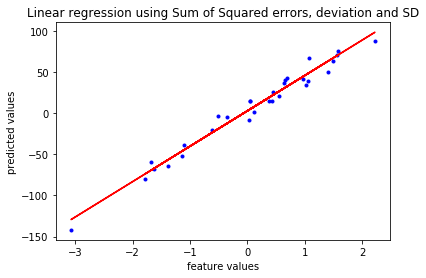

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

entries = 30
features = 1

X, y = make_regression(n_samples=entries, n_features=features, noise=10)
# print(X)
n = np.size(X)
mean_X, mean_y = np.mean(X), np.mean(y)
SD_X = sum((X-mean_X)**2)[0]
SD_y = sum((y-mean_y)**2)
r = (sum(np.multiply(X-mean_X,y.reshape(X.shape[0], 1) - mean_y)))[0]/((SD_X*SD_y)**0.5)   # corr coeff
sm = (SD_y/SD_X)**0.5
m = r*sm                                     #sm = Sy/Sx
c = mean_y - m*mean_X
y_pred1 = m*X + c

print("Standard deviation of X: ", SD_X)
print("Standard deviation of y: ", SD_y)
print("Correlation coefficient(r): ", r)
print("Sy/Sx = ", sm)
print("Slope of our line: ", m)
print("Intercept: ", c)

plt.scatter(X, y, color="blue", marker='.')
plt.plot(X, y_pred1, color="red")
plt.xlabel("feature values")
plt.ylabel("predicted values")
plt.title("Linear regression using Sum of Squared errors, deviation and SD")
plt.show()

# Implementing multi-variate LR without directly using inbuild functions and relationship between number of features vs. MSE

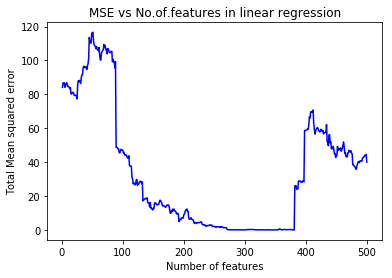

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

entries = 1000
max_features_of_graph = 500

TMSE = np.ones((max_features_of_graph,1))
X, y = make_regression(n_samples=entries, n_features=max_features_of_graph, noise = 0)

for no_features in range(max_features_of_graph):
    
    features = no_features+1
    
    Xi = X[:, :no_features+1]

    X_mean = np.sum(Xi, axis=0)/entries      # contains all xmean 
    y_mean = np.mean(y)

#     n = entries

    SD_X = sum((Xi-X_mean)**2)  # SD of each feature
#     print("SD of each feature      ",SD_X) 
    SD_y = sum((y-y_mean)**2)  # SD of dependant variable
#     print("SD of dependant variable", SD_y)

    num = sum(np.multiply(Xi-X_mean, y.reshape(entries, 1) - y_mean))

    slopes = np.ones((features))
    intercept = 0
    sigma_mx = 0

    for i in range(features):

        denom = (SD_X[i]*SD_y)**0.5
        r = num[i]/denom
        sm = (SD_y/SD_X[i])**0.5
        m = r*sm
        slopes[i] = m
        sigma_mx += m*X_mean[i]
    
  
    intercept = y_mean - sigma_mx
    slopes = slopes.reshape(features,1)
    z = np.dot(Xi,slopes)
    y_pred = z+intercept
    abserr = (y_pred-y.reshape(entries,1))
    MSE = sum(abserr[0]**2)/entries
    TMSE[no_features] = MSE

plt.plot(list(range(1,max_features_of_graph+1)), TMSE, color="blue")
plt.xlabel("Number of features")
plt.ylabel("Total Mean squared error")
plt.title("MSE vs No.of.features in linear regression")
plt.show()

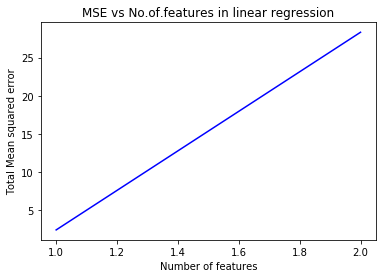

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

entries = 10
max_features_of_graph = 2

TMSE = np.ones((max_features_of_graph,1))
X, y = make_regression(n_samples=entries, n_features=max_features_of_graph, noise = 0)

for no_features in range(max_features_of_graph):
    
    features = no_features+1
    
    Xi = X[:, :no_features+1]

    X_mean = np.sum(Xi, axis=0)/entries      # contains all xmean 
    y_mean = np.mean(y)

#     n = entries

    SD_X = sum((Xi-X_mean)**2)  # SD of each feature
#     print("SD of each feature      ",SD_X) 
    SD_y = sum((y-y_mean)**2)  # SD of dependant variable
#     print("SD of dependant variable", SD_y)

    num = sum(np.multiply(Xi-X_mean, y.reshape(entries, 1) - y_mean))

    slopes = np.ones((features))
    intercept = 0
    sigma_mx = 0

    for i in range(features):

        denom = (SD_X[i]*SD_y)**0.5
        r = num[i]/denom
        sm = (SD_y/SD_X[i])**0.5
        m = r*sm
        slopes[i] = m
        sigma_mx += m*X_mean[i]
    
  
    intercept = y_mean - sigma_mx
    slopes = slopes.reshape(features,1)
    z = np.dot(Xi,slopes)
    y_pred = z+intercept
    abserr = (y_pred-y.reshape(entries,1))
    MSE = sum(abserr[0]**2)/entries
    TMSE[no_features] = MSE



# plt.plot(list(range(1,max_features_of_graph+1)), TMSE, color="blue")
# plt.xlabel("Number of features")
# plt.ylabel("Total Mean squared error")
# plt.title("MSE vs No.of.features in linear regression")
# plt.show()